# Pandas Data Analysis Assignment

### Name Here
### Date Here

## Objective
In this assignment, you will work with a real-world dataset to practice data import, cleaning, manipulation, and exploratory data analysis (EDA) using pandas.

Hint, for a lot of this, you'll also be finding yourself referencing the documents for these packages. 

Second Hint, these are the packages you'll be installing and importing.

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)\
[Numpy](https://numpy.org/doc/)\
[Matplotlib](https://matplotlib.org/stable/index.html)\
[seaborn](https://seaborn.pydata.org/index.html)


In [58]:
# Import packages used. You may have to pip install some of these. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the data from the superstore_sales.csv file. 
df_superstore_csv = pd.read_csv('superstore_sales.csv')

# Load the dataset as a dataframe
# I COMBINED STEP 2 AND 3 FOR EASE OF ACCESS

# Display first 10 rows of your dataset.
print(df_superstore_csv.head(10))
df_superstore_csv


   Order Date   Ship Date Region Customer Name Product Name         Category  \
0  2023-05-11  2023-05-12  South   Customer_36   Product_34       Technology   
1  2023-11-11  2023-11-16   West   Customer_68   Product_11  Office Supplies   
2  2021-05-02  2021-05-11   East   Customer_78   Product_45       Technology   
3  2022-04-12  2022-04-18   East   Customer_41   Product_47        Furniture   
4  2021-11-27  2021-12-04    NaN   Customer_89   Product_12  Office Supplies   
5  2021-03-29  2021-04-03   West   Customer_62   Product_21  Office Supplies   
6  2023-05-22  2023-05-28   East   Customer_10   Product_11       Technology   
7  2021-05-11  2021-05-16  South   Customer_21   Product_39  Office Supplies   
8  2023-02-09  2023-02-18   East   Customer_36   Product_28        Furniture   
9  2021-12-10  2021-12-16   West   Customer_12    Product_5        Furniture   

     Sales  Profit   Shipping Mode  
0   502.64   91.16        Same Day  
1   134.43   30.17  Standard Class  
2   923.

,Order Date,Ship Date,Region,Customer Name,Product Name,Category,Sales,Profit,Shipping Mode
0,2023-05-11,2023-05-12,South,Customer_36,Product_34,Technology,502.64,91.16,Same Day
1,2023-11-11,2023-11-16,West,Customer_68,Product_11,Office Supplies,134.43,30.17,Standard Class
2,2021-05-02,2021-05-11,East,Customer_78,Product_45,Technology,923.29,253.97,NaN
3,2022-04-12,2022-04-18,East,Customer_41,Product_47,Furniture,1468.14,364.17,Second Class
4,2021-11-27,2021-12-04,NaN,Customer_89,Product_12,Office Supplies,1217.40,NaN,Same Day
...,...,...,...,...,...,...,...,...,...
995,2021-05-08,2021-05-17,Central,Customer_17,Product_47,Office Supplies,1835.36,300.84,First Class
996,2021-02-11,2021-02-13,South,Customer_36,Product_33,Office Supplies,819.12,139.66,Same Day
997,2021-02-10,2021-02-12,West,Customer_19,Product_46,Technology,295.13,70.67,Second Class
998,2023-07-23,2023-07-26,East,Customer_64,Product_5,Furniture,1432.29,172.56,Second Class


## Data Cleaning

In [59]:
# Check for null values in your dataframe. In a comment, tell me where, and how many (if any) null values there are. 
print(df_superstore_csv.shape)
df_superstore_csv.info()
# YES there are null values in the Region, Profit and Shipping Mode columns 
# There are 50 Null values in each of the above columns
null_count = df_superstore_csv.isnull().sum()
print(null_count)
#this confirms my above code for accuracy at a drilled down level

(1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     1000 non-null   object 
 1   Ship Date      1000 non-null   object 
 2   Region         950 non-null    object 
 3   Customer Name  1000 non-null   object 
 4   Product Name   1000 non-null   object 
 5   Category       1000 non-null   object 
 6   Sales          1000 non-null   float64
 7   Profit         950 non-null    float64
 8   Shipping Mode  950 non-null    object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB
Order Date        0
Ship Date         0
Region           50
Customer Name     0
Product Name      0
Category          0
Sales             0
Profit           50
Shipping Mode    50
dtype: int64


In [60]:
# for columns with missing null values, fill the na values with values that make sense (i.e., mean/mode values, etc.)
#OK so We dont want to fill with NaN or 0 Because it could affect us later (especially with Net Profit) so we will use mean, median or mode to fill 
region_w_mode = df_superstore_csv['Region'].mode()[0]
profit_w_median = df_superstore_csv['Profit'].median()
shipping_w_mode = df_superstore_csv['Shipping Mode'].mode()[0]

#df_superstore_csv['Region'].fillna(region_w_mode, inplace=True)
#df_superstore_csv['Profit'].fillna(profit_w_median, inplace=True)
#df_superstore_csv['Shipping Mode'].fillna(shipping_w_mode, inplace=True)

#above was my orginal thought, but when executed I got a FutureWarning error saying when pandas updates to pd 3.0 It will not work and suggested I rewrite to the below
df_superstore_csv.fillna({
    'Region': region_w_mode,
    'Profit': profit_w_median,
    'Shipping Mode': shipping_w_mode
}, inplace=True)
print(df_superstore_csv.info()) #Confirm that all rows now have 1000 no nulls 
df_superstore_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     1000 non-null   object 
 1   Ship Date      1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer Name  1000 non-null   object 
 4   Product Name   1000 non-null   object 
 5   Category       1000 non-null   object 
 6   Sales          1000 non-null   float64
 7   Profit         1000 non-null   float64
 8   Shipping Mode  1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB
None


,Order Date,Ship Date,Region,Customer Name,Product Name,Category,Sales,Profit,Shipping Mode
0,2023-05-11,2023-05-12,South,Customer_36,Product_34,Technology,502.64,91.16,Same Day
1,2023-11-11,2023-11-16,West,Customer_68,Product_11,Office Supplies,134.43,30.17,Standard Class
2,2021-05-02,2021-05-11,East,Customer_78,Product_45,Technology,923.29,253.97,Standard Class
3,2022-04-12,2022-04-18,East,Customer_41,Product_47,Furniture,1468.14,364.17,Second Class
4,2021-11-27,2021-12-04,Central,Customer_89,Product_12,Office Supplies,1217.40,143.17,Same Day
...,...,...,...,...,...,...,...,...,...
995,2021-05-08,2021-05-17,Central,Customer_17,Product_47,Office Supplies,1835.36,300.84,First Class
996,2021-02-11,2021-02-13,South,Customer_36,Product_33,Office Supplies,819.12,139.66,Same Day
997,2021-02-10,2021-02-12,West,Customer_19,Product_46,Technology,295.13,70.67,Second Class
998,2023-07-23,2023-07-26,East,Customer_64,Product_5,Furniture,1432.29,172.56,Second Class


## Data Manipulation

In [61]:
# Convert Order Date to datetime format
df_superstore_csv['Order Date'] = pd.to_datetime(df_superstore_csv['Order Date'])
df_superstore_csv
# Create new column for Profit Margin
df_superstore_csv['Profit Margin'] = ((df_superstore_csv['Profit'] / df_superstore_csv['Sales'])*100).round(2)
print(df_superstore_csv[['Sales', 'Profit', 'Profit Margin']].head())

# Extract year and month
df_superstore_csv['Order Date'].dt.year #pulls year
df_superstore_csv['Order Date'].dt.month #pulls month

print(df_superstore_csv['Order Date'].dt.month) 

print(df_superstore_csv['Order Date'].dt.year)
#The problem didnt ask us to but it may be useful to also adjust the "Ship Date" column to Date time format for consistency

     Sales  Profit  Profit Margin
0   502.64   91.16          18.14
1   134.43   30.17          22.44
2   923.29  253.97          27.51
3  1468.14  364.17          24.80
4  1217.40  143.17          11.76
0       5
1      11
2       5
3       4
4      11
       ..
995     5
996     2
997     2
998     7
999     2
Name: Order Date, Length: 1000, dtype: int32
0      2023
1      2023
2      2021
3      2022
4      2021
       ... 
995    2021
996    2021
997    2021
998    2023
999    2021
Name: Order Date, Length: 1000, dtype: int32


## Data Analysis

In [62]:
# Find top 5 most profitable products
cash_cows = df_superstore_csv.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head()
print(cash_cows)

Product Name
Product_47    6308.77
Product_17    5601.38
Product_27    5073.22
Product_19    4801.76
Product_13    4787.00
Name: Profit, dtype: float64


In [63]:
# Find total sales and profit per region
totals_by_region = df_superstore_csv.groupby('Region')[['Sales', 'Profit']].sum()
print(totals_by_region)

             Sales    Profit
Region                      
Central  297945.83  51054.57
East     241120.39  40727.46
South    215839.68  36635.94
West     236226.72  40302.34


## Data Visualization

             Sales
Region            
Central  297945.83
East     241120.39
South    215839.68
West     236226.72


<Axes: title={'center': 'Total Sales by Region'}, xlabel='Region'>

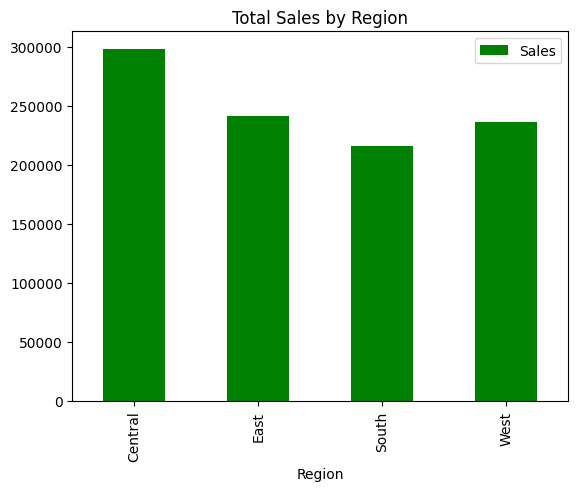

In [ ]:
# make a bar chart of total Sales by Region
total_sales_by_region = df_superstore_csv.groupby('Region')[['Sales']].sum()
print(total_sales_by_region) #Telling us the exact values, because without gridline on the chart (would look ugly) its hard to say exactly what the ammounts are

total_sales_by_region.plot.bar( title = 'Total Sales by Region', color = "Green")

<Axes: title={'center': 'Sales vs Profit'}, xlabel='Sales', ylabel='Profit'>

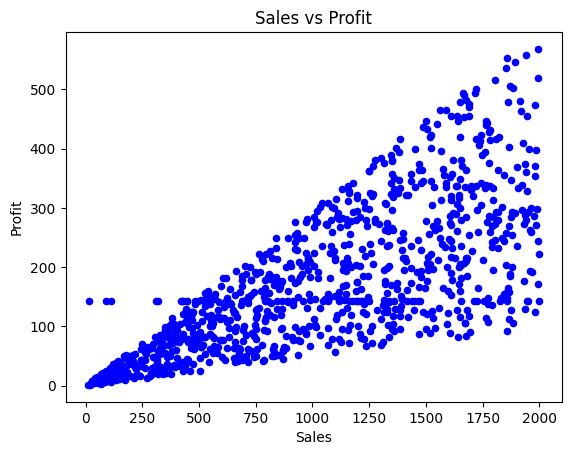

In [87]:
# Make a scatter plot of Sales vs Profit
df_superstore_csv.plot(kind="scatter", x='Sales', y='Profit', title='Sales vs Profit', color='Blue')


## Analysis

In the markdown block below, give me a written analysis of your code blocks above. What is the data telling you? Are there any issues you can see with the processes that create the data? What projections, if any, can we make with our analysis to add value?

MY ANALYSIS

The data shows that the Central region is the top sales region, followed by West, then South, and lastly East based on total sales. This is helpful for management to see what markets are performing the best and what markets they may need to do some additional research or marketing in. 
With the Eastern region and Western region as key revenue drivers, management would know to investigate why the Eastern Region is performing the worst. Some market research can be done to determine what to do to increase sales in that region. Do they need to increase marketing? Is the Eastern region oversaturated with competitors? Do they need to focus on inventory prioritization, generate a promotional push, or adjust pricing in that region? Is there an operational gap in the East? Are the stores in the East not as efficient?

The scatterplot shows that bulk sales boost profitability, their profit increases as they get to an economy of scale. This is typically expected in most industries that are not heavily service-based. There are some significant outliers, I would suggest some research into these outliers to further optimize margins. 

Some issues may also have arisen from the null values, while filling the nulls with median and mode is a good substitute for initial analysis and keeps us relatively accurate, we may need to talk to the sales or accounting team to see WHY there are missing values, are they supposed to be 0s, were they just not entered by accident or is there a reporting issue by the system? If the missing values are due to error or accidental oversight, this may cause future problems for things like sales tax reporting & compliance or it could an intentional null value meaning the values do not need to be there, if we received that answer it would be better to use dropna() to just get rid of those values all together. 

Another thing that may be worthwhile to investigate is the profit margin by product name and region, this will allow us to leverage these insights to sell more of the profitable items (like product_47) versus the low margin products, which may need to be repriced or phased out altogether. We could pair this data with other metrics like inventory management, where we could stock higher profit items in the High sales regions like Central and West, while testing some drivers for demand in the Lower performing regions.


## Grading Rubric

Grading overall will be on a 100-point scale. Everyone starts with 100, the final score will be determined based on point deductions related to the overall quality of your code and analysis. The expectation for code is that comments will be included as appropriate, the code is easy to read, efficient, and performs the tasks asked of you. Grading will be more lenient if you attempt more complex code or combinations of code (assuming it makes sense to do so). The analysis will be scored based on proper grammar (spelling, format, composition), and how practical and thoughtful it is. If you have any questions, think about the "cold reader" rule, "Would someone with basic knowledge of this subject matter be able to read through my work in one shot without a lot of questions?"

Lastly, while collaboration on theory and methods is encouraged, DO NOT share your code line for line with your classmates. Blatant and obvious copying of any parts of your assignment will lead to deductions. This is the time to really develop your individual and analysis styles. 


